## Problem Statement:
#### Chinese Automobile Company- Geely Auto wants to understnad the factors on which the pricing of cars depends in the US.
#### They want to understand:
1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car
    

## Business Goal:
1. Identify how the price of the car varies with the independent variable 
2. Building a model to help the management understand the pricing dynamics of a new market. 

## Steps that we will follow to achieve the goal:
1. Reading and Understanding the data.
2. Visualizing the Data.
3. Data Preperation.
4. Data Split-Test and Train sets.
5. Building a Linear Model.
6. Residual Analysis of the train data.
7. Making Prediction using the Final Model.
8. Model Eveluation.

## Step1: Reading and Understanding of Data

Importing of Libraries and Supressing the warnings

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df=pd.read_csv("CarPrice_Assignment.csv")

Information about the dataset

In [3]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_df.shape

(205, 26)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

From the above metrics we could identify that there are no null values in any of the coloumns.

In [6]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
## Checking if there are any duplicate rowns present in the data frame:
car_df[car_df.duplicated(keep=False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Here we could observe that there are no duplicate rows as well.

## Step 2: Visualizing the Data

#### We will try to find out two important points here:
1. Important Predictor Variables.
2. Presence of multicollinearity. 

##### Plotting the Pair Plot 

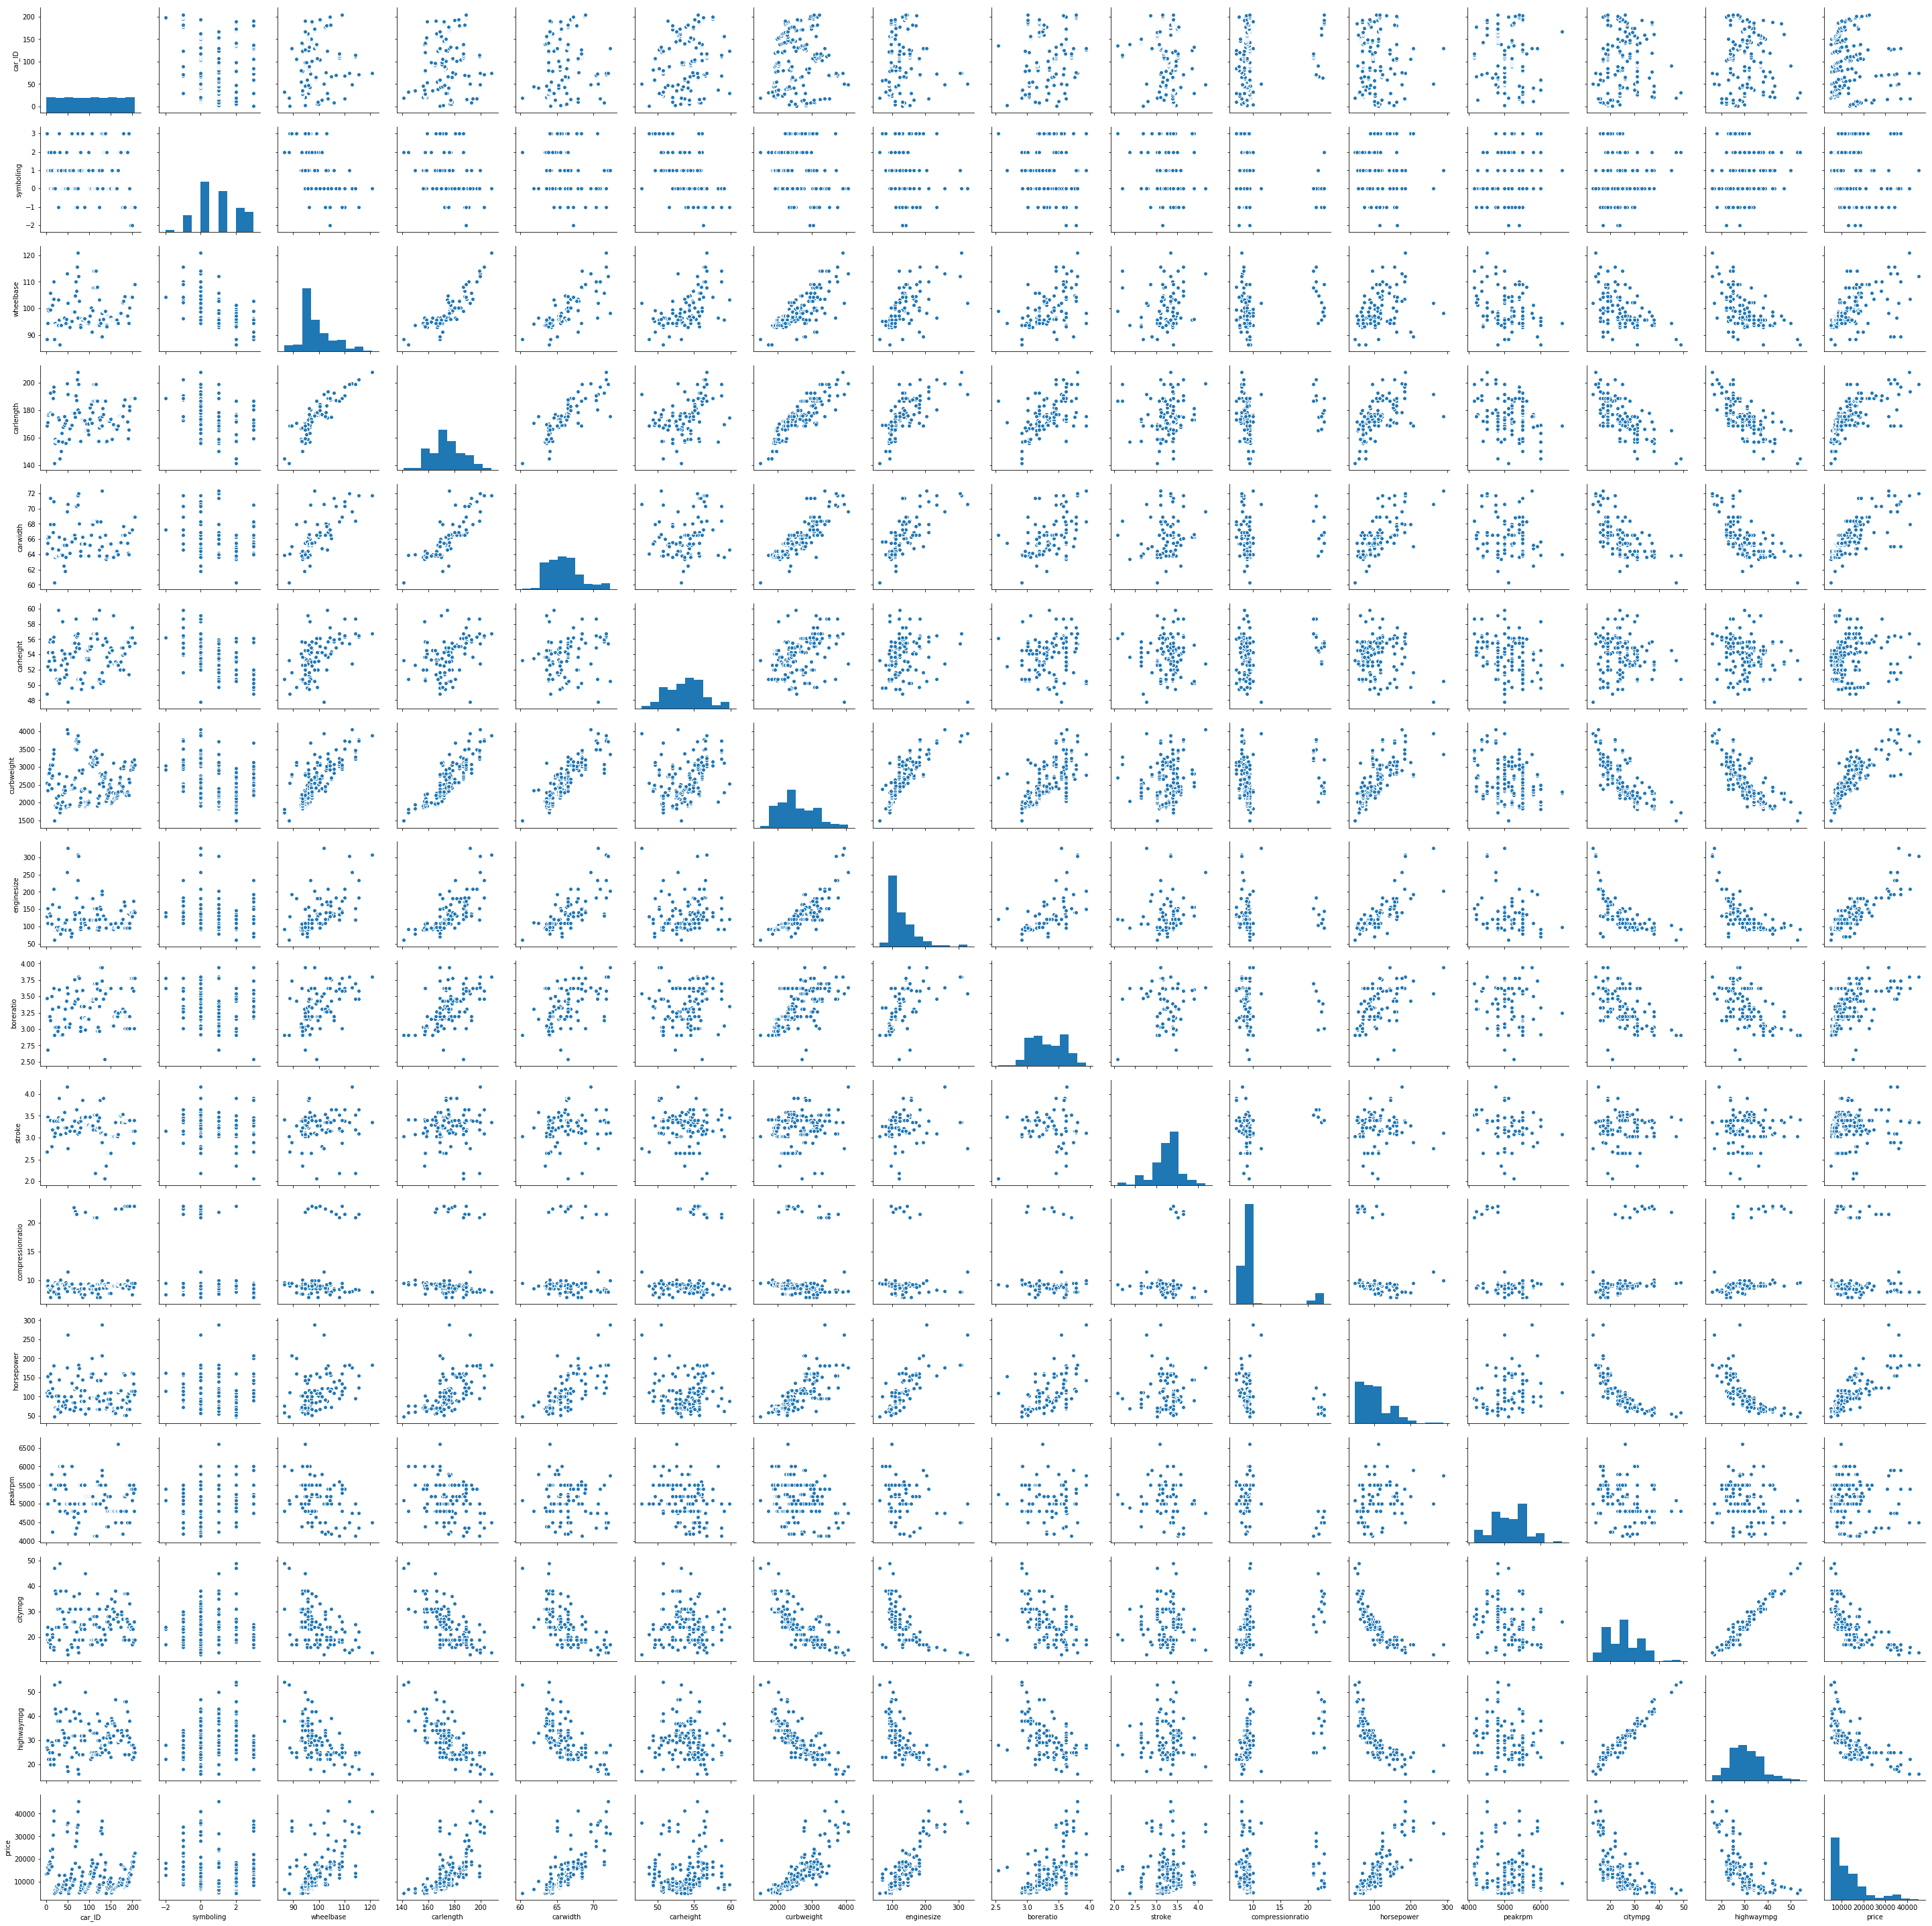

In [8]:
sns.pairplot(car_df)

##### Plotting the Heat Map

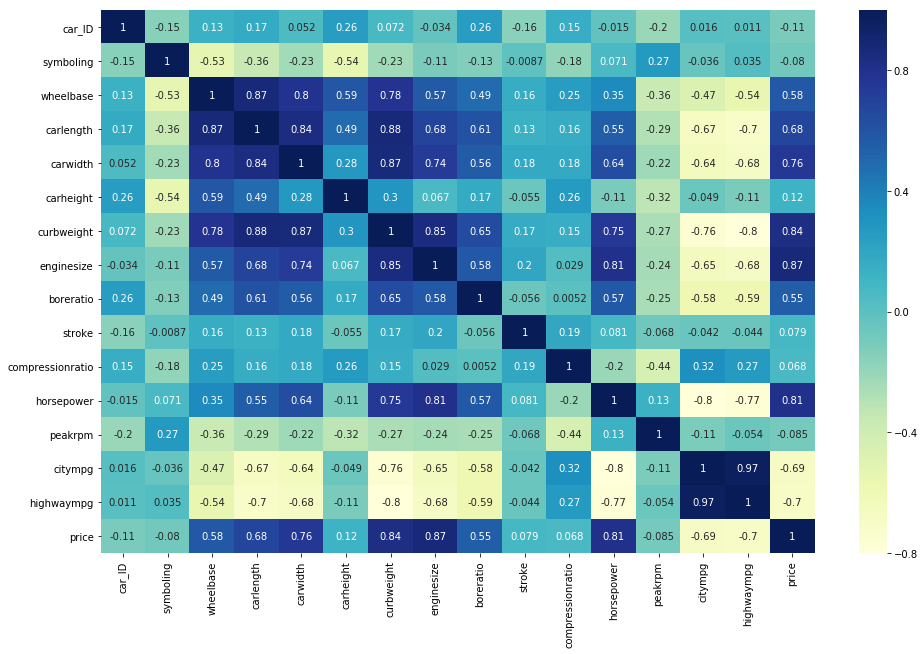

In [9]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_df.corr(),cmap='YlGnBu',annot=True)

### Prelimnary interpretetation of the Heat Map:

The prelimnary interpretation of the heat map could show us that the following variables could possibly be strong predictors: <br>
**Engine Size,Car Weight,Horse power,Car Width, Car Length, Wheel base.**



Similarly the prilimnary interpretation could suggests some stong collinearity amoung the variables:<br>
**WheelBase:** Car Length<br>
**CarLength**: wheelbase,Car Weidth,curbweight<br>
**curbweight**:enginesize<br>
**citympg**:highwaympg<br>

So we decide to remove the following variables:<br>
wheelbase, carlength, carwidth, highwaympg

In [10]:
#Dropping the highly corellated variables 
car_df.drop(['wheelbase','carlength','carwidth','highwaympg'],axis=1,inplace=True)

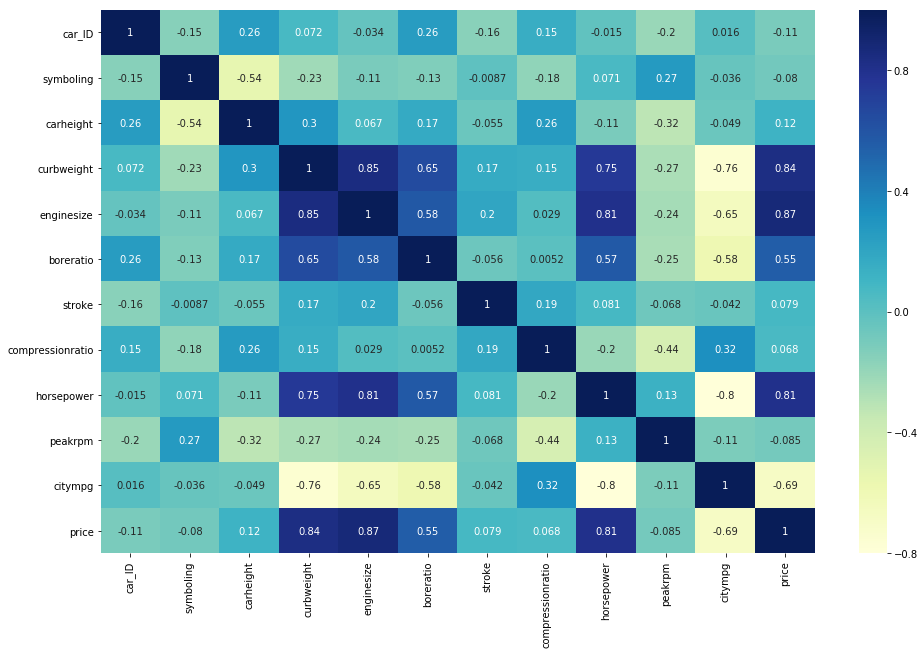

In [11]:
#Doing a heat map again
plt.figure(figsize = (16, 10))
sns.heatmap(car_df.corr(),cmap='YlGnBu',annot=True)

##### Visualizing Categorical Variables with Boxplots:

Modifing the Car Name column by keeping only the Company Name of the Car.

In [12]:
car_df.CarName=car_df.CarName.map(lambda x: x.split(" ")[0])

In [13]:
car_df.CarName=car_df.CarName.str.lower()

In [14]:
car_df.CarName=car_df.CarName.str.replace('maxda','mazda')
car_df.CarName=car_df.CarName.str.replace('porcshce','porsche')
car_df.CarName=car_df.CarName.str.replace('toyouta','toyota')
car_df.CarName=car_df.CarName.str.replace('vokswagen','volkswagen')
car_df.CarName=car_df.CarName.str.replace('vw','volkswagen')

car_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


Trying to understand different catagories that we have in the catagorical columns

In [16]:
car_df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [17]:
car_df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
car_df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [19]:
car_df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [20]:
car_df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [21]:
car_df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [22]:
car_df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
car_df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### Plotting Box plots of the above categorical values to visualize what relation they have with the Price.

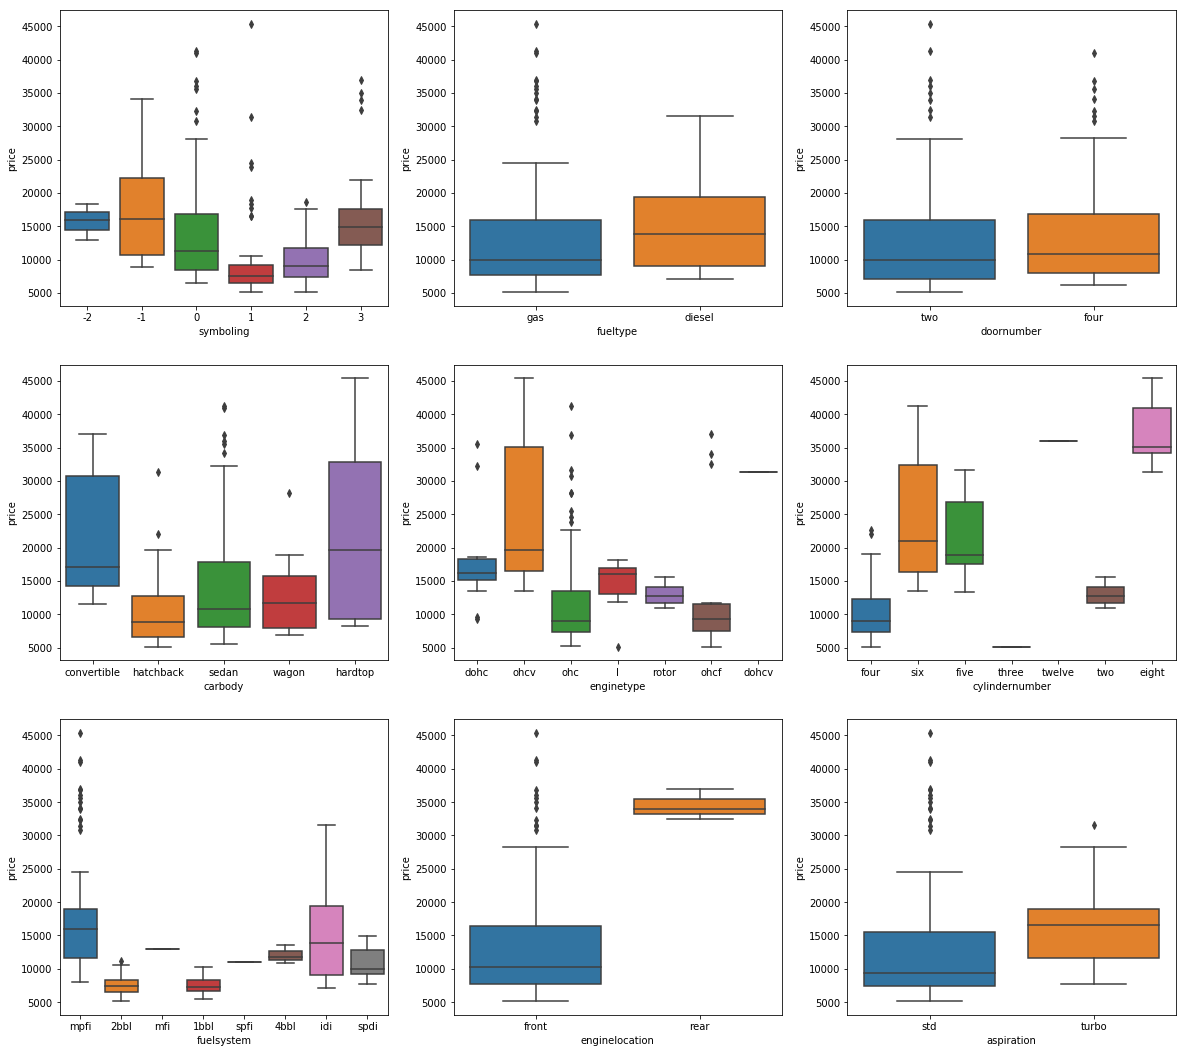

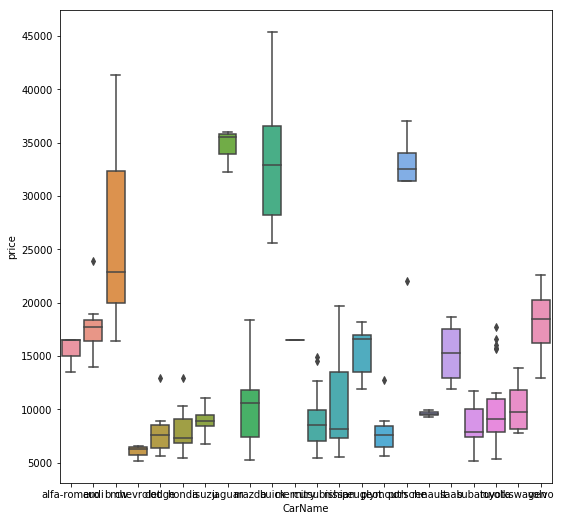

In [24]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_df)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = car_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'aspiration', y = 'price', data = car_df)
plt.figure(figsize=(30, 40))
plt.subplot(4,3,10)
sns.boxplot(x = 'CarName', y = 'price', data = car_df)

#### Observations of the Box Plots:
1. We could observe that enginelocation,aspiration have a good amount of association with price.
2. Also enginetype and cylindernumber might have a good association.
3. In the symboling we can observe that either the most risky or the pretty safe catagory are higher priced than the    stable ones.
4. The fuletype and doornumber have a significant are of the plots overlapping, so its not very clear of its relationsip with the price.

## Step3: Data Preperation

#### In this we will convert the categorical values into numerical values of 1s and 0s.
1. First we will take the variables having only two catarory
2. Then we will handel the variables having more than 2 categories.

1. We could observe from the data set that **'fueltype'**, **'aspiration'**, **'doornumber'** and **'enginelocation'** are the variables that have 2 category of responses. So we will first adress these variables and try and quantify them.

In [25]:
car_df.fueltype= car_df.fueltype.map({'gas':1,'diesel':0})
car_df.aspiration=car_df.aspiration.map({'std':1,'turbo':0})
car_df.doornumber=car_df.doornumber.map({'two':1,'four':0})
car_df.enginelocation=car_df.enginelocation.map({'front':1,'rear':0})

In [26]:
car_df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.000
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,48.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.000
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,52.4,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.000
3,4,2,audi,1,1,0,sedan,fwd,1,54.3,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.000
4,5,2,audi,1,1,0,sedan,4wd,1,54.3,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.000
5,6,2,audi,1,1,1,sedan,fwd,1,53.1,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,15250.000
6,7,1,audi,1,1,0,sedan,fwd,1,55.7,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,17710.000
7,8,1,audi,1,1,0,wagon,fwd,1,55.7,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,18920.000
8,9,1,audi,1,0,0,sedan,fwd,1,55.9,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,23875.000
9,10,0,audi,1,0,1,hatchback,4wd,1,52.0,...,five,131,mpfi,3.13,3.40,7.0,160,5500,16,17859.167


2. Now, we will have to adress the categorical varibales having more than 2 responses with the use of 'dummy variables'.

In [27]:
# creating dummies and renaming the dummy columns for the symboling column and dropping the first dummy column:

symboling_status=pd.get_dummies(car_df['symboling'],drop_first=True)
symboling_status=symboling_status.rename(columns={-1:'-1_symboling',
                                                   0: '0_symboling',
                                                   1: '1_symboling',
                                                   2: '2_symboling',
                                                   3: '3_symboling'})
#symboling_status=symboling_status.rename
symboling_status

,-1_symboling,0_symboling,1_symboling,2_symboling,3_symboling
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,1,0,0,0


In [28]:
# creating dummies for the CarName column and dropping the first dummy column:
carname_status=pd.get_dummies(car_df['CarName'],drop_first=True)
carname_status

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# creating dummies for the carbody column and dropping the first dummy column:
carbody_status=pd.get_dummies(car_df['carbody'],drop_first=True)
carbody_status

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


In [30]:
# creating dummies and renaming the dummy columns for the enginetype column and dropping the first dummy column:

enginetype_status=pd.get_dummies(car_df['enginetype'],drop_first=True)
enginetype_status=enginetype_status.rename(columns={'dohcv':'enginetype_dohcv',
                                            'l':'enginetype_l',
                                            'ohc':'enginetype_ohc',
                                            'ohcf':'enginetype_ohcf',
                                            'ohcv':'enginetype_ohcv',
                                            'rotor':'enginetype_rotor'})
enginetype_status

,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
8,0,0,1,0,0,0
9,0,0,1,0,0,0


In [31]:
# creating dummies and renaming the dummy columns for the cylindernumber column and dropping the first dummy column:

cylindernum_status=pd.get_dummies(car_df['cylindernumber'],drop_first=True)
cylindernum_status=cylindernum_status.rename(columns={'five':'cylnum_five',
                                                      'four':'cylnum_four',
                                                      'six':'cylnum_six',
                                                       'three':'cylnum_three',
                                                        'twelve':'cylnum_twelve',
                                                        'two':'cylnum_two'})
cylindernum_status

,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,1,0,0,0,0,0


In [32]:
# creating dummies and renaming the dummy columns for the fuelsystem column and dropping the first dummy column:

fuelsys_status=pd.get_dummies(car_df['fuelsystem'],drop_first=True)
fuelsys_status=fuelsys_status.rename(columns={'2bbl':'fulsys_2bbl',
                                             '4bbl':'fulsys_4bbl',
                                             'idi':'fulsys_idi',
                                             'mfi':'fulsys_mfi',
                                              'mpfi':'fulsys_mpfi',
                                             'spdi':'fulsys_spdi',
                                             'spfi':'fulsys_spfi'})
fuelsys_status

,fulsys_2bbl,fulsys_4bbl,fulsys_idi,fulsys_mfi,fulsys_mpfi,fulsys_spdi,fulsys_spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0


In [33]:
car_df=pd.concat([car_df,symboling_status,carname_status,carbody_status,enginetype_status,cylindernum_status,fuelsys_status],axis=1)
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,...,cylnum_three,cylnum_twelve,cylnum_two,fulsys_2bbl,fulsys_4bbl,fulsys_idi,fulsys_mfi,fulsys_mpfi,fulsys_spdi,fulsys_spfi
0,1,3,alfa-romero,1,1,1,convertible,rwd,1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,1,1,1,convertible,rwd,1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,1,1,1,hatchback,rwd,1,52.4,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,1,1,0,sedan,fwd,1,54.3,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,1,1,0,sedan,4wd,1,54.3,...,0,0,0,0,0,0,0,1,0,0
5,6,2,audi,1,1,1,sedan,fwd,1,53.1,...,0,0,0,0,0,0,0,1,0,0
6,7,1,audi,1,1,0,sedan,fwd,1,55.7,...,0,0,0,0,0,0,0,1,0,0
7,8,1,audi,1,1,0,wagon,fwd,1,55.7,...,0,0,0,0,0,0,0,1,0,0
8,9,1,audi,1,0,0,sedan,fwd,1,55.9,...,0,0,0,0,0,0,0,1,0,0
9,10,0,audi,1,0,1,hatchback,4wd,1,52.0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
-1_symboling        2

In [35]:
## droping the un necessary columns: 
car_df.drop(['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1,inplace=True)

car_df.head(10)

,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,...,cylnum_three,cylnum_twelve,cylnum_two,fulsys_2bbl,fulsys_4bbl,fulsys_idi,fulsys_mfi,fulsys_mpfi,fulsys_spdi,fulsys_spfi
0,48.8,2548,130,3.47,2.68,9.0,111,5000,21,13495.000,...,0,0,0,0,0,0,0,1,0,0
1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,16500.000,...,0,0,0,0,0,0,0,1,0,0
2,52.4,2823,152,2.68,3.47,9.0,154,5000,19,16500.000,...,0,0,0,0,0,0,0,1,0,0
3,54.3,2337,109,3.19,3.40,10.0,102,5500,24,13950.000,...,0,0,0,0,0,0,0,1,0,0
4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,17450.000,...,0,0,0,0,0,0,0,1,0,0
5,53.1,2507,136,3.19,3.40,8.5,110,5500,19,15250.000,...,0,0,0,0,0,0,0,1,0,0
6,55.7,2844,136,3.19,3.40,8.5,110,5500,19,17710.000,...,0,0,0,0,0,0,0,1,0,0
7,55.7,2954,136,3.19,3.40,8.5,110,5500,19,18920.000,...,0,0,0,0,0,0,0,1,0,0
8,55.9,3086,131,3.13,3.40,8.3,140,5500,17,23875.000,...,0,0,0,0,0,0,0,1,0,0
9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,17859.167,...,0,0,0,0,0,0,0,1,0,0


In [36]:
car_df.columns.unique

<bound method Index.unique of Index(['carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       '-1_symboling', '0_symboling', '1_symboling', '2_symboling',
       '3_symboling', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylnum_five', 'cylnum_four',
       'cylnum_six', 'cylnum_three', 'cylnum_twelve', 'cylnum_two',
       'fulsys_2bbl', 'fulsys_4bbl', 'fulsys_idi', 'fulsys_mfi', 'fulsys_mpfi',
       'fulsys_spdi', 'fulsys_spfi'],
      dtype='object')>

In [37]:
car_df.shape

(205, 59)

In [38]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
-1_symboling        205 non-null uint8
0_symboling         205 non-null uint8
1_symboling         205 non-null uint8
2_symboling         205 non-null uint8
3_symboling         205 non-null uint8
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               205 non-null uint8
chevrolet           205 non-null uint8
dodge               205 non-null uint8
honda               205 non-null uint8
isuzu               205 non-null uint8
jaguar              205 non

Now, finally we have achieved the data set on which we would be performing our analytics and builiding models.

## Step4: Data Split-Test and Train sets

#### Here we will split the data set into test and train sets in the proportion of 70-30 and then perform the 'Scaling' on the data sets to make the data ready for analysis.

### Data Splitting

In [39]:
# importing the libarary:
from sklearn.model_selection import train_test_split

## Splitting the data set into test(70%) and train(30%) proportions:
np.random.seed(0)
car_df_train,car_df_test=train_test_split(car_df,train_size=0.7,test_size=0.3,random_state=100)

In [40]:
car_df_train.head()

,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,...,cylnum_three,cylnum_twelve,cylnum_two,fulsys_2bbl,fulsys_4bbl,fulsys_idi,fulsys_mfi,fulsys_mpfi,fulsys_spdi,fulsys_spfi
122,50.8,2191,98,2.97,3.23,9.4,68,5500,31,7609.0,...,0,0,0,1,0,0,0,0,0,0
125,50.2,2778,151,3.94,3.11,9.5,143,5500,19,22018.0,...,0,0,0,0,0,0,0,1,0,0
166,52.6,2300,98,3.24,3.08,9.4,112,6600,26,9538.0,...,0,0,0,0,0,0,0,1,0,0
1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,16500.0,...,0,0,0,0,0,0,0,1,0,0
199,57.5,3157,130,3.62,3.15,7.5,162,5100,17,18950.0,...,0,0,0,0,0,0,0,1,0,0


### Rescaling of the featurs:

As we have observed that the different variables are in different ranges so we have to bring them into a similar scale to be able to perform the analysis on the variable.

In [41]:
# Importing MinMax scaler:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [42]:
# applyting the Scaler to the variables which we wnat to scale:
num_variables=['carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

car_df_train[num_variables]=scale.fit_transform(car_df_train[num_variables])



In [43]:
car_df_train.describe()

,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,...,cylnum_three,cylnum_twelve,cylnum_two,fulsys_2bbl,fulsys_4bbl,fulsys_idi,fulsys_mfi,fulsys_mpfi,fulsys_spdi,fulsys_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.219310,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.215682,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.067298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.140343,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.313479,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


Here we could observe that all the values are brought into a uniform scale of 0-1.

## Step 5: Model building using RFE

In [44]:
# Imprting RFE and Liner Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# diving the train data set into x train and y train:
y_train=car_df_train.pop('price')
X_train=car_df_train


In [46]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carheight', False, 20),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 35),
 ('horsepower', True, 1),
 ('peakrpm', False, 15),
 ('citympg', False, 6),
 ('-1_symboling', True, 1),
 ('0_symboling', False, 2),
 ('1_symboling', False, 3),
 ('2_symboling', False, 4),
 ('3_symboling', False, 5),
 ('audi', False, 12),
 ('bmw', True, 1),
 ('buick', False, 11),
 ('chevrolet', False, 37),
 ('dodge', False, 33),
 ('honda', False, 34),
 ('isuzu', False, 19),
 ('jaguar', False, 36),
 ('mazda', False, 17),
 ('mercury', False, 42),
 ('mitsubishi', False, 29),
 ('nissan', False, 21),
 ('peugeot', False, 7),
 ('plymouth', False, 30),
 ('porsche', True, 1),
 ('renault', False, 18),
 ('saab', False, 9),
 ('subaru', False, 32),
 ('toyota', False, 22),
 ('volkswagen', False, 14),
 ('volvo', True, 1),
 ('hardtop', False, 26),
 ('hatchback', False, 23),
 ('sedan', False, 25),
 ('wagon', False, 24),
 ('enginetype_dohcv', False

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       '-1_symboling', 'bmw', 'porsche', 'volvo', 'enginetype_rotor',
       'cylnum_five', 'cylnum_four', 'cylnum_three', 'cylnum_twelve',
       'cylnum_two'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index(['carheight', 'compressionratio', 'peakrpm', 'citympg', '0_symboling',
       '1_symboling', '2_symboling', '3_symboling', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylnum_six', 'fulsys_2bbl',
       'fulsys_4bbl', 'fulsys_idi', 'fulsys_mfi', 'fulsys_mpfi', 'fulsys_spdi',
       'fulsys_spfi'],
      dtype='object')

### Building the model using the statsmodel, for detailed statistics

We will now build the linear model using the above derived 15 variables

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,curbweight,enginesize,boreratio,stroke,horsepower,-1_symboling,bmw,porsche,volvo,enginetype_rotor,cylnum_five,cylnum_four,cylnum_three,cylnum_twelve,cylnum_two
122,0.272692,0.139623,0.230159,0.525253,0.083333,0,0,0,0,0,0,1,0,0,0
125,0.500388,0.339623,1.000000,0.464646,0.395833,0,0,1,0,0,0,1,0,0,0
166,0.314973,0.139623,0.444444,0.449495,0.266667,0,0,0,0,0,0,1,0,0,0
1,0.411171,0.260377,0.626984,0.247475,0.262500,0,0,0,0,0,0,1,0,0,0
199,0.647401,0.260377,0.746032,0.484848,0.475000,1,0,0,1,0,0,1,0,0,0
190,0.284329,0.181132,0.404762,0.611111,0.175000,0,0,0,0,0,0,1,0,0,0
96,0.187355,0.135849,0.373016,0.555556,0.087500,0,0,0,0,0,0,1,0,0,0
177,0.376261,0.230189,0.500000,0.681818,0.183333,1,0,0,0,0,0,1,0,0,0
181,0.645074,0.377358,0.468254,0.585859,0.450000,1,0,0,0,0,0,0,0,0,0
97,0.212956,0.135849,0.373016,0.555556,0.087500,0,0,0,0,0,0,1,0,0,0


I want to undersatnd the corellation of the selected variables. So I will plot a corellation table

In [51]:
correl_table=X_train_rfe.corr()
correl_table

,curbweight,enginesize,boreratio,stroke,horsepower,-1_symboling,bmw,porsche,volvo,enginetype_rotor,cylnum_five,cylnum_four,cylnum_three,cylnum_twelve,cylnum_two
curbweight,1.000000,0.865102,0.625759,0.209277,0.759759,0.348574,0.165348,0.115210,0.196516,-0.040089,0.273471,-0.593859,-0.162583,0.218088,-0.040089
enginesize,0.865102,1.000000,0.545157,0.228768,0.817916,0.265438,0.229151,0.206896,0.103578,-0.217946,0.162473,-0.613032,-0.131452,0.413197,-0.217946
boreratio,0.625759,0.545157,1.000000,-0.152836,0.518307,0.155598,0.110709,0.318523,0.228723,0.014733,-0.000743,-0.138491,-0.128229,0.075047,0.014733
stroke,0.209277,0.228768,-0.152836,1.000000,0.106454,0.129587,-0.039245,-0.098740,-0.070604,0.002685,0.191336,-0.153683,-0.059299,-0.132053,0.002685
horsepower,0.759759,0.817916,0.518307,0.106454,1.000000,0.181174,0.187407,0.407216,0.113391,0.029774,0.138966,-0.663004,-0.115652,0.338032,0.029774
-1_symboling,0.348574,0.265438,0.155598,0.129587,0.181174,1.000000,-0.066178,-0.046291,0.419129,-0.053644,0.218543,-0.257523,-0.026537,-0.026537,-0.053644
bmw,0.165348,0.229151,0.110709,-0.039245,0.187407,-0.066178,1.000000,-0.030635,-0.043796,-0.035501,-0.054236,-0.274573,-0.017562,-0.017562,-0.035501
porsche,0.115210,0.206896,0.318523,-0.098740,0.407216,-0.046291,-0.030635,1.000000,-0.030635,-0.024832,-0.037937,-0.136351,-0.012284,-0.012284,-0.024832
volvo,0.196516,0.103578,0.228723,-0.070604,0.113391,0.419129,-0.043796,-0.030635,1.000000,-0.035501,-0.054236,-0.035644,-0.017562,-0.017562,-0.035501
enginetype_rotor,-0.040089,-0.217946,0.014733,0.002685,0.029774,-0.053644,-0.035501,-0.024832,-0.035501,1.000000,-0.043963,-0.287127,-0.014236,-0.014236,1.000000


In [52]:
# as cylnum_two and enginetype_rotor are very strongly corellated we can drop the cylnum_two
X_train_rfe.drop(['cylnum_two'],axis=1,inplace=True)

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [55]:
lm.params

const              -0.234162
curbweight          0.306817
enginesize          1.618711
boreratio          -0.407447
stroke             -0.290347
horsepower          0.151201
-1_symboling        0.039602
bmw                 0.287241
porsche             0.294339
volvo               0.097733
enginetype_rotor    0.599959
cylnum_five         0.269103
cylnum_four         0.274025
cylnum_three        0.432627
cylnum_twelve      -0.597533
dtype: float64

In [56]:
#Checking the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.30e-67
Time:                        22:55:22   Log-Likelihood:                 208.08
No. Observations:                 143   AIC:                            -386.2
Df Residuals:                     128   BIC:                            -341.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2342      0.040  

In [ ]:
#x_train_1 = X_train_rfe.drop(['cylnum_twelve'], axis=1)

We could observe from the above stats that the 'Adjusted R square' value is ~0.92. Which means 92% of the deviation is explained by our model. This is a **GOOD** indication.

Looking at the P values we could observe that is 1 varibale '-1_symboling' whose p value is 0.062.<br>

As we are aware that the p-values of the cofficient must be less than 0.05, so we decide here to drop the variable '-1_symboling'. <br>

We can augment our decision by looking at the VIF table before dropping the variable.

In [57]:
# Calculating the VIFs for the  model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.39
2,enginesize,27.91
12,cylnum_four,15.57
1,curbweight,7.45
3,boreratio,6.13
10,enginetype_rotor,5.93
5,horsepower,5.41
14,cylnum_twelve,3.31
11,cylnum_five,3.08
4,stroke,2.49


The desirable values of the VIF must be < 5. In the VIF table we could see that there are some varibales that have a VIF value significantly higher than 5. So we will have to drop them one by one checking the VIF values all the time before dropping.

### Model 2:

In [58]:
#dropping feature '-1_symboling' from model


X = X.drop(['-1_symboling'], axis=1)

In [59]:
# Checking the columns
X.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'bmw', 'porsche', 'volvo', 'enginetype_rotor',
       'cylnum_five', 'cylnum_four', 'cylnum_three', 'cylnum_twelve'],
      dtype='object')

In [60]:
 # Running the linear model after dropping feature  'twelve' 
    
import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_1 = sm.OLS(y_train,x_const).fit() 

In [61]:
# Summary of the model 2

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.09e-67
Time:                        22:55:42   Log-Likelihood:                 206.13
No. Observations:                 143   AIC:                            -384.3
Df Residuals:                     129   BIC:                            -342.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2300      0.040  

In [62]:
# Calculate the VIFs for the new model after dropping 'twelve'

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.19
2,enginesize,27.91
11,cylnum_four,15.44
1,curbweight,7.34
3,boreratio,6.13
9,enginetype_rotor,5.92
5,horsepower,5.33
13,cylnum_twelve,3.31
10,cylnum_five,3.07
4,stroke,2.48


### Model 3:

We will drop 'horsepower' that has a p-value of >0.05

In [63]:
X = X.drop(['horsepower'], axis=1)

In [64]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'porsche', 'volvo', 'enginetype_rotor', 'cylnum_five', 'cylnum_four',
       'cylnum_three', 'cylnum_twelve'],
      dtype='object')

In [65]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_2 = sm.OLS(y_train,x_const).fit() 

In [66]:
#Let's see the summary of our linear model after dropping column

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     137.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.04e-67
Time:                        22:56:14   Log-Likelihood:                 204.14
No. Observations:                 143   AIC:                            -382.3
Df Residuals:                     130   BIC:                            -343.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2034      0.038  

Now we could observe that all the p-values of the coefficients are less than 0.05.<br>
Now lets check the VIF values of the variables.

In [67]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.53
2,enginesize,27.90
10,cylnum_four,13.58
1,curbweight,6.97
3,boreratio,5.90
8,enginetype_rotor,5.80
12,cylnum_twelve,3.08
9,cylnum_five,2.87
4,stroke,2.45
11,cylnum_three,1.71


### Model 4:

 As the VIF vale of the 'enginesize' >5 lets drop the variable first

In [68]:
X = X.drop(['enginesize'], axis=1)

In [69]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'boreratio', 'stroke', 'bmw', 'porsche', 'volvo',
       'enginetype_rotor', 'cylnum_five', 'cylnum_four', 'cylnum_three',
       'cylnum_twelve'],
      dtype='object')

In [70]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_3 = sm.OLS(y_train,x_const).fit() 

In [71]:
#Let's see the summary of our linear model after dropping column

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     86.73
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.40e-54
Time:                        22:56:38   Log-Likelihood:                 168.11
No. Observations:                 143   AIC:                            -312.2
Df Residuals:                     131   BIC:                            -276.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0186      0.042  

As we could observe that the p-value of cylnum_three  > 0.05, so we can drop that now in our next model.

In [72]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.06
1,curbweight,5.12
9,cylnum_four,3.99
2,boreratio,3.07
7,enginetype_rotor,1.52
8,cylnum_five,1.49
3,stroke,1.34
5,porsche,1.32
4,bmw,1.28
10,cylnum_three,1.24


### Model 5

In [73]:
X = X.drop(['cylnum_three'], axis=1)

In [74]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'boreratio', 'stroke', 'bmw', 'porsche', 'volvo',
       'enginetype_rotor', 'cylnum_five', 'cylnum_four', 'cylnum_twelve'],
      dtype='object')

In [75]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_4 = sm.OLS(y_train,x_const).fit() 

In [76]:
#Let's see the summary of our linear model after dropping column

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     96.13
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.39e-55
Time:                        22:56:58   Log-Likelihood:                 168.11
No. Observations:                 143   AIC:                            -314.2
Df Residuals:                     132   BIC:                            -281.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0181      0.039  

In [77]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.92
1,curbweight,4.51
9,cylnum_four,3.33
2,boreratio,2.98
8,cylnum_five,1.45
7,enginetype_rotor,1.42
3,stroke,1.34
5,porsche,1.30
4,bmw,1.25
10,cylnum_twelve,1.15


We could look at the boreratio which has a p-value more than 0.05. So we decide to drop it

### Model 6

In [78]:
X = X.drop(['boreratio'], axis=1)

In [79]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'stroke', 'bmw', 'porsche', 'volvo',
       'enginetype_rotor', 'cylnum_five', 'cylnum_four', 'cylnum_twelve'],
      dtype='object')

In [80]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_5 = sm.OLS(y_train,x_const).fit() 

In [81]:
#Let's see the summary of our linear model after dropping column

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     107.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.30e-56
Time:                        22:57:16   Log-Likelihood:                 168.11
No. Observations:                 143   AIC:                            -316.2
Df Residuals:                     133   BIC:                            -286.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0182      0.038  

In [82]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.29
8,cylnum_four,2.52
1,curbweight,1.88
7,cylnum_five,1.45
6,enginetype_rotor,1.28
3,bmw,1.21
2,stroke,1.15
9,cylnum_twelve,1.13
5,volvo,1.10
4,porsche,1.09


We could observe that the 'enginetype_rotor' p-value is > 0.05. So we will drop that variable

### Model 7 (not required)

In [83]:
X = X.drop(['enginetype_rotor'], axis=1)

In [84]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'stroke', 'bmw', 'porsche', 'volvo',
       'cylnum_five', 'cylnum_four', 'cylnum_twelve'],
      dtype='object')

In [85]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_6 = sm.OLS(y_train,x_const).fit() 

In [86]:
#Let's see the summary of our linear model after dropping column

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.24e-57
Time:                        22:57:37   Log-Likelihood:                 168.02
No. Observations:                 143   AIC:                            -318.0
Df Residuals:                     134   BIC:                            -291.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0243      0.035     -0.686

In [87]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.08
7,cylnum_four,1.98
1,curbweight,1.77
6,cylnum_five,1.36
3,bmw,1.17
2,stroke,1.15
8,cylnum_twelve,1.13
5,volvo,1.10
4,porsche,1.08


Variable 'cylnum_five' has a p-value > 0.05 so we decide to drop it.

### Model 8

In [88]:
X = X.drop(['cylnum_five'], axis=1)

In [89]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'stroke', 'bmw', 'porsche', 'volvo',
       'cylnum_four', 'cylnum_twelve'],
      dtype='object')

In [90]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_7 = sm.OLS(y_train,x_const).fit() 

In [91]:
#Let's see the summary of our linear model after dropping column

print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.58e-58
Time:                        22:58:10   Log-Likelihood:                 167.54
No. Observations:                 143   AIC:                            -319.1
Df Residuals:                     135   BIC:                            -295.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0184      0.035     -0.529

In [92]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.16
1,curbweight,1.77
6,cylnum_four,1.66
2,stroke,1.14
3,bmw,1.11
7,cylnum_twelve,1.11
5,volvo,1.09
4,porsche,1.06


Here the p- value of stroke is > 0.05, so we decide to drop it.

### Model 9:

In [93]:
X = X.drop(['stroke'], axis=1)

In [94]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'bmw', 'porsche', 'volvo', 'cylnum_four',
       'cylnum_twelve'],
      dtype='object')

In [95]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_8 = sm.OLS(y_train,x_const).fit() 

In [96]:
#Let's see the summary of our linear model after dropping column

print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.92e-59
Time:                        22:58:28   Log-Likelihood:                 167.03
No. Observations:                 143   AIC:                            -320.1
Df Residuals:                     136   BIC:                            -299.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0027      0.027      0.099

The p Value of 'volvo' is again >0.05. So we decide to drop it.

### Model 10:

In [97]:
X = X.drop(['volvo'], axis=1)

In [98]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'bmw', 'porsche', 'cylnum_four',
       'cylnum_twelve'],
      dtype='object')

In [99]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_9 = sm.OLS(y_train,x_const).fit() 

In [100]:
#Let's see the summary of our linear model after dropping column

print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     192.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.51e-60
Time:                        22:58:49   Log-Likelihood:                 165.99
No. Observations:                 143   AIC:                            -320.0
Df Residuals:                     137   BIC:                            -302.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0019      0.027     -0.069

In [101]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.85
4,cylnum_four,1.64
1,curbweight,1.59
2,bmw,1.09
5,cylnum_twelve,1.06
3,porsche,1.03


Here altough all the p values are <0.05 but still to have a more stable model we will drop the 'cylnum_twelve' having p value 0.011

### Model 11:

In [102]:
X = X.drop(['cylnum_twelve'], axis=1)

In [103]:
#Checking the Columns
X.columns

Index(['const', 'curbweight', 'bmw', 'porsche', 'cylnum_four'], dtype='object')

In [104]:
#Running the linear model after dropping 

import statsmodels.api as sm 
x_const=sm.add_constant(X)
lm_10 = sm.OLS(y_train,x_const).fit() 

In [105]:
#Let's see the summary of our linear model after dropping column

print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.58e-60
Time:                        23:00:27   Log-Likelihood:                 162.59
No. Observations:                 143   AIC:                            -315.2
Df Residuals:                     138   BIC:                            -300.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0059      0.028     -0.210      

Now we have all the variables with the p Values <0.05. So we will look at the VIF valus and if all the variables VIF values < 5 then we will finalize the model. 

In [118]:
# Calculate the VIFs for the new model after dropping 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,17.79
4,cylnum_four,1.64
1,curbweight,1.55
2,bmw,1.09
3,porsche,1.03


We could observe that all the VIF values are < 5.

In [106]:
## Droppin  the constant.
X_train_11 = X.drop(['const'], axis=1)

## Step 6: Residual Analysis

In [108]:
# Predicting the y value:
y_train_price = lm_10.predict(X)

In [ ]:
y_train_price.head()

C:\Users\156638\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

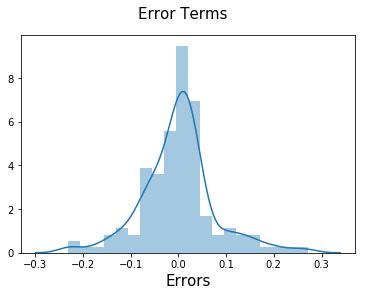

In [109]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Plot the histogram of the error terms
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)  

Here we could observe that all the error terms are normally distributed and the are centered around 0.

## Step 7: Making Predictions:

### Applying scaling on test set

In [110]:
# applyting the Scaler to the variables which we wnat to scale:
num_variables=['carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

car_df_test[num_variables]=scale.transform(car_df_test[num_variables])

In [111]:
# diving the train data set into x train and y train:
y_test=car_df_test.pop('price')
X_test=car_df_test


In [112]:
#passing the selected significant features as X-test1 

X_test1=X_test[X_train_11.columns]

In [113]:
# Adding a constant variable X_test1 

X_test1 = sm.add_constant(X_test1)

In [115]:
#Making Prediction of price using final model

y_pred=lm_10.predict(X_test1)

Text(0,0.5,'y_pred')

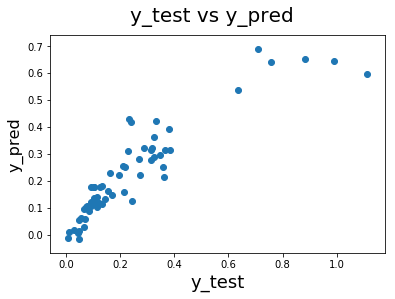

In [116]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### Calculating the R-squared score on the test set:

In [117]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7992697411600731

We could see that the R Squared score on the test set is ~0.80<br>

The Varibales that are significant to predict the price of the car are:<br>
cylinder number_four<br> 
curbweight<br> 
bmw<br> 
porsche<br> 
